In [1]:
# 8.1
# Construct a Gibbs Sampler to compute the probability of the population mean, standard deviation and the difference 
# the two subpopulations conditioned on the data from the two subpopulations

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm
import seaborn as sns

In [3]:
# Read Data In
Y_school_mathscore = pd.read_csv('Y.school.mathscore', index_col=0)
y1 = pd.read_csv('y.school1', index_col=0)
y2 = pd.read_csv('y.school2', index_col=0)
n1 = len(y1)
n2 = len(y2)

In [4]:
# Set prior parameters
mu0 = 50
g02 = 625
delta0 = 0
t02 = 625
s20 = 100
nu0 = 1

In [5]:
# Starting Values
mu = (np.mean(y1) + np.mean(y2)) / 2
delta = (np.mean(y1) - np.mean(y2)) / 2

In [6]:
# Gibbs Sampler
MU = []
DELTA = []
S2 = []

for s in range(5000):
    
    # Update s2
    size = 1
    shape = (nu0 + n1 + n2) / 2
    rate = (nu0 * s20 + np.sum((y1 - mu - delta)**2) + np.sum((y2 - mu + delta)**2)) / 2
    s2 = 1 / gamma.rvs(a=shape, scale=1/rate, size=1)[0]
    
    # Update mu
    var_mu = 1 / (1 / g02 + (n1 + n2) / s2)
    mean_mu = var_mu * (mu0 / g02 + np.sum(y1 - delta) / s2 + np.sum(y2 + delta) / s2)
    mu = norm.rvs(loc=mean_mu, scale=np.sqrt(var_mu), size=1)[0]
    
    # Update delta
    var_del = 1 / (1 / t02 + (n1 + n2) / s2)
    mean_del = var_del * (delta0 / t02 + np.sum(y1 - mu)/s2 - np.sum(y2 - mu) / s2)
    delta = norm.rvs(loc=mean_del, scale=np.sqrt(var_del), size=1)[0]
    
    # Save parameters
    MU.append(mu)
    DELTA.append(delta)
    S2.append(s2)
    

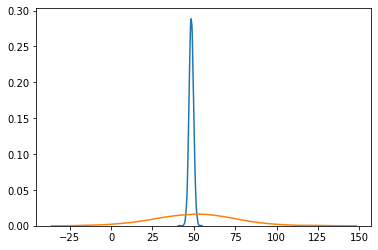

In [7]:
prior_mu = norm(loc=mu0, scale=np.sqrt(g02))
prior_mus = prior_mu.rvs(1000)

sns.kdeplot(MU);
sns.kdeplot(prior_mus);

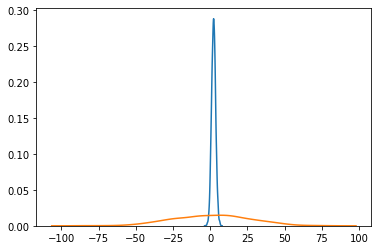

In [8]:
prior_del = norm(loc=0, scale=np.sqrt(t02))
prior_dels = prior_del.rvs(1000)

sns.kdeplot(DELTA);
sns.kdeplot(prior_dels);